In [26]:

def calc_polar(Re, Im):
    import math
    A = []
    fi = []
    for i in range(len(Re)):
        A.append( (Im[i]**2 + Re[i]**2 )**(1/2) )
        fi.append(-math.atan2(Im[i], Re[i]))
    return fi, A

def calc_coords(fi, A):
    import math
    Re = []
    Im = []
    for i in range(len(A)):
        Re.append(A[i]*math.cos(fi[i]))
        Im.append(-A[i]*math.sin(fi[i]))
    return Re, Im

def approxim(fi, A, k):
    from numpy.polynomial import Polynomial
    import numpy as np

    approximation = Polynomial.fit(fi , A, k)

    fi=np.linspace(min(fi), max(fi), 500)

    A= approximation(fi)
    return fi, A




    
        

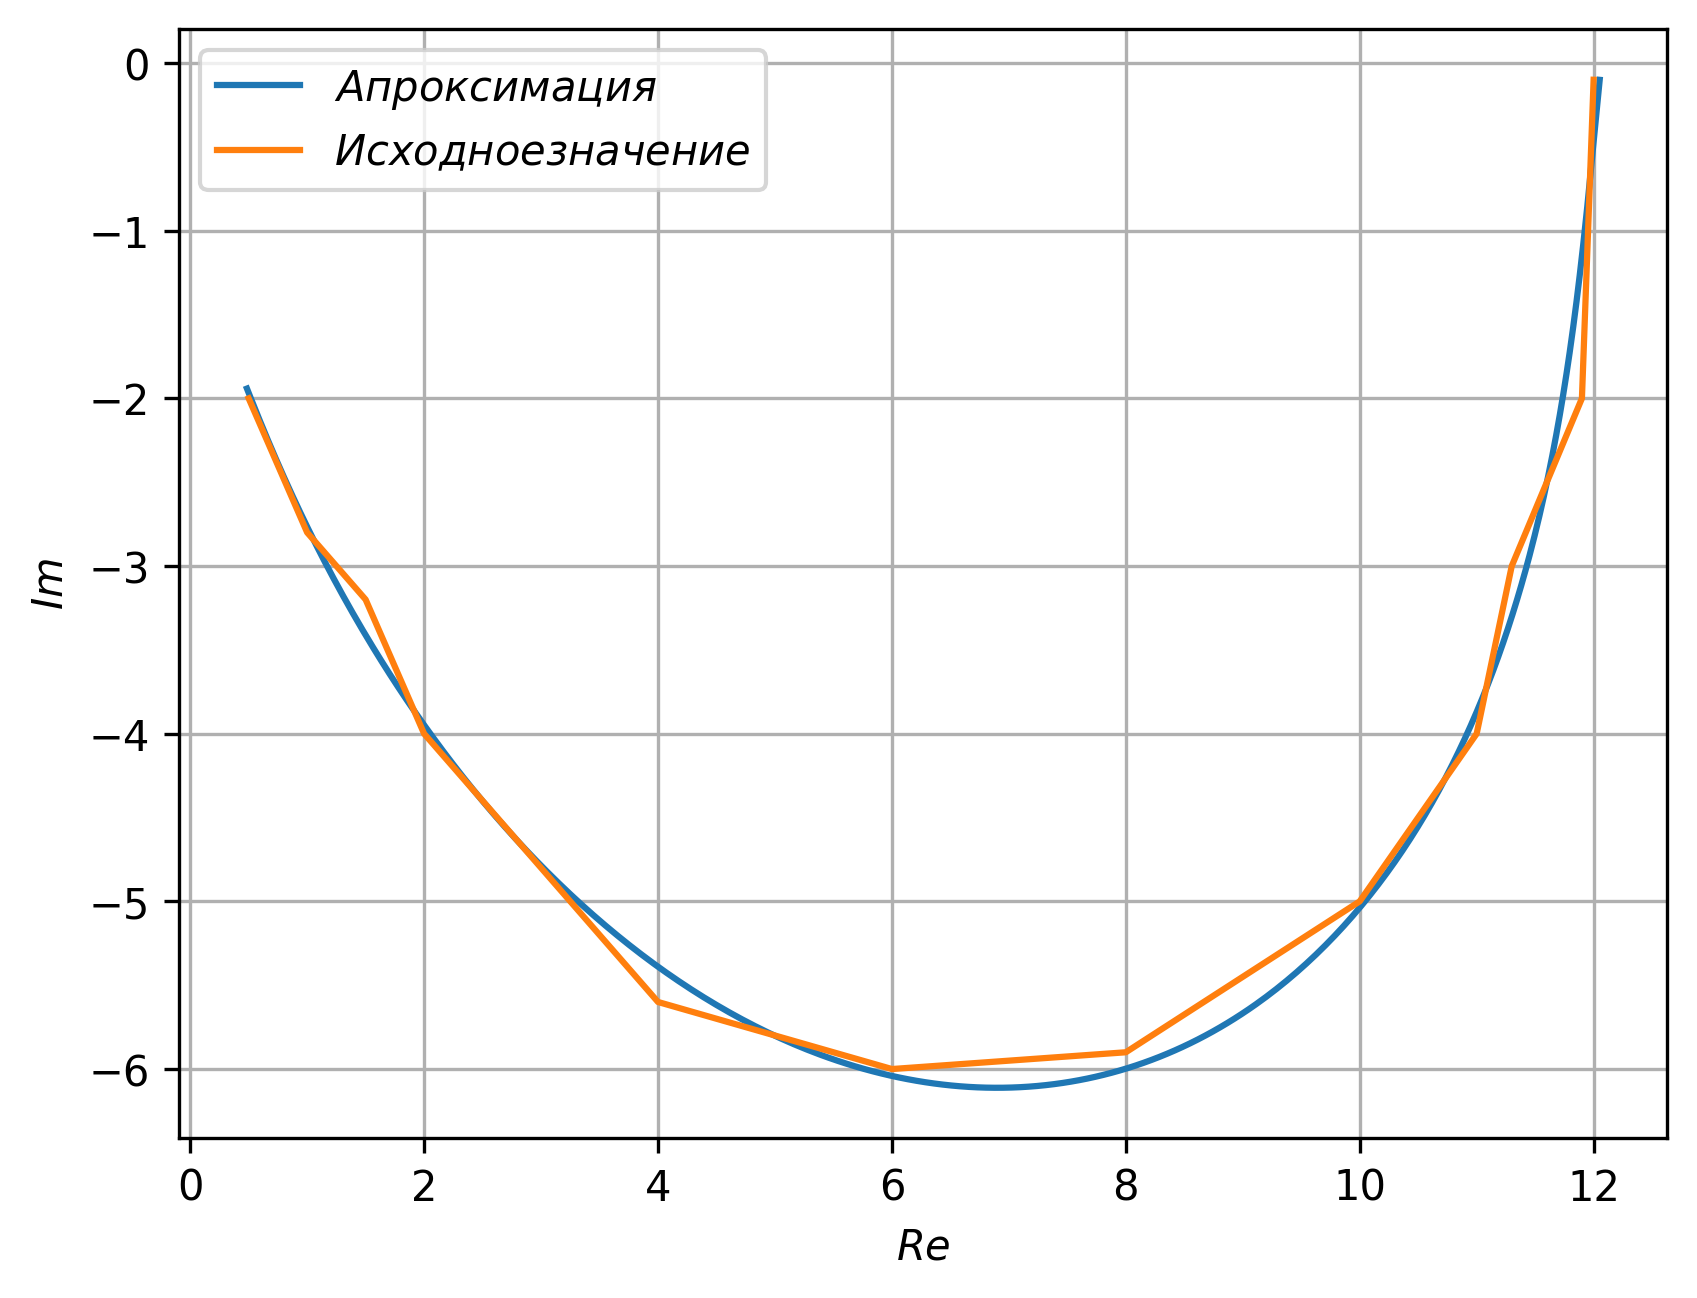

In [39]:
import matplotlib.pyplot as plt
import math

Re_st = [12, 11.9, 11.3, 11,10,8,6,4,2,1.5,1,0.5]
Im_st = [-0.1,-2,-3,-4,-5,-5.9,-6,-5.6,-4,-3.2,-2.8,-2]

fi_st_0, A_st_0 = calc_polar(Re_st, Im_st)
fi_st, A_st = approxim(fi_st_0, A_st_0, 4)
Re_st, Im_st = calc_coords(fi_st, A_st)
Re_st_0, Im_st_0 = calc_coords(fi_st_0, A_st_0)

plt.plot(Re_st, Im_st, label='$Апроксимация$')
plt.plot(Re_st_0, Im_st_0, label='$Исходное значение$')
plt.legend()
plt.grid()
plt.xlabel("$Re$")
plt.ylabel("$Im$")
plt.show()

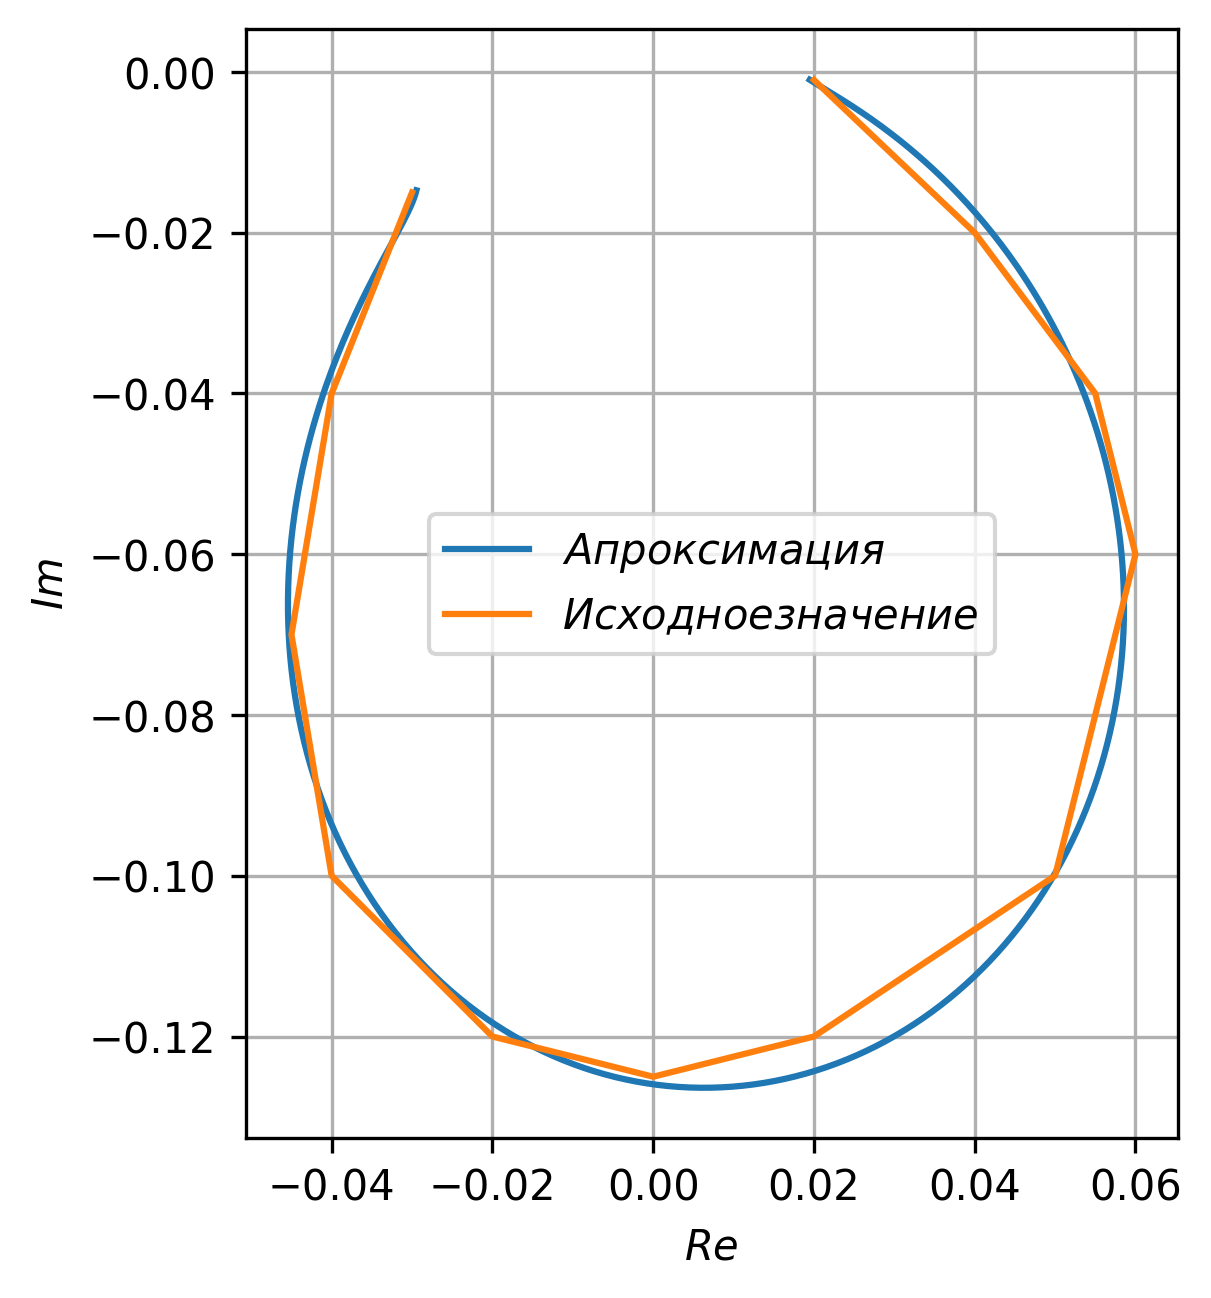

In [56]:
Re_rez = [0.02,0.04,0.055,0.06,0.05,0.02,0,-0.02,-0.04,-0.045,-0.04,-0.03]
Im_rez = [-0.001,-0.02,-0.04,-0.06,-0.1,-0.12,-0.125,-0.12,-0.1,-0.07,-0.04,-0.015]
fi_rez_0, A_rez_0 = calc_polar(Re_rez, Im_rez)
Re_rez_0, Im_rez_0 = Re_rez, Im_rez
fi_rez, A_rez = approxim(fi_rez_0, A_rez_0, 5)
Re_rez, Im_rez = calc_coords(fi_rez, A_rez)


plt.plot(Re_rez, Im_rez, label='$Апроксимация$')
plt.plot(Re_rez_0, Im_rez_0, label='$Исходное значение$')
plt.legend()
plt.grid()
plt.gca().set_aspect('equal')
plt.xlabel("$Re$")
plt.ylabel("$Im$")
plt.show()

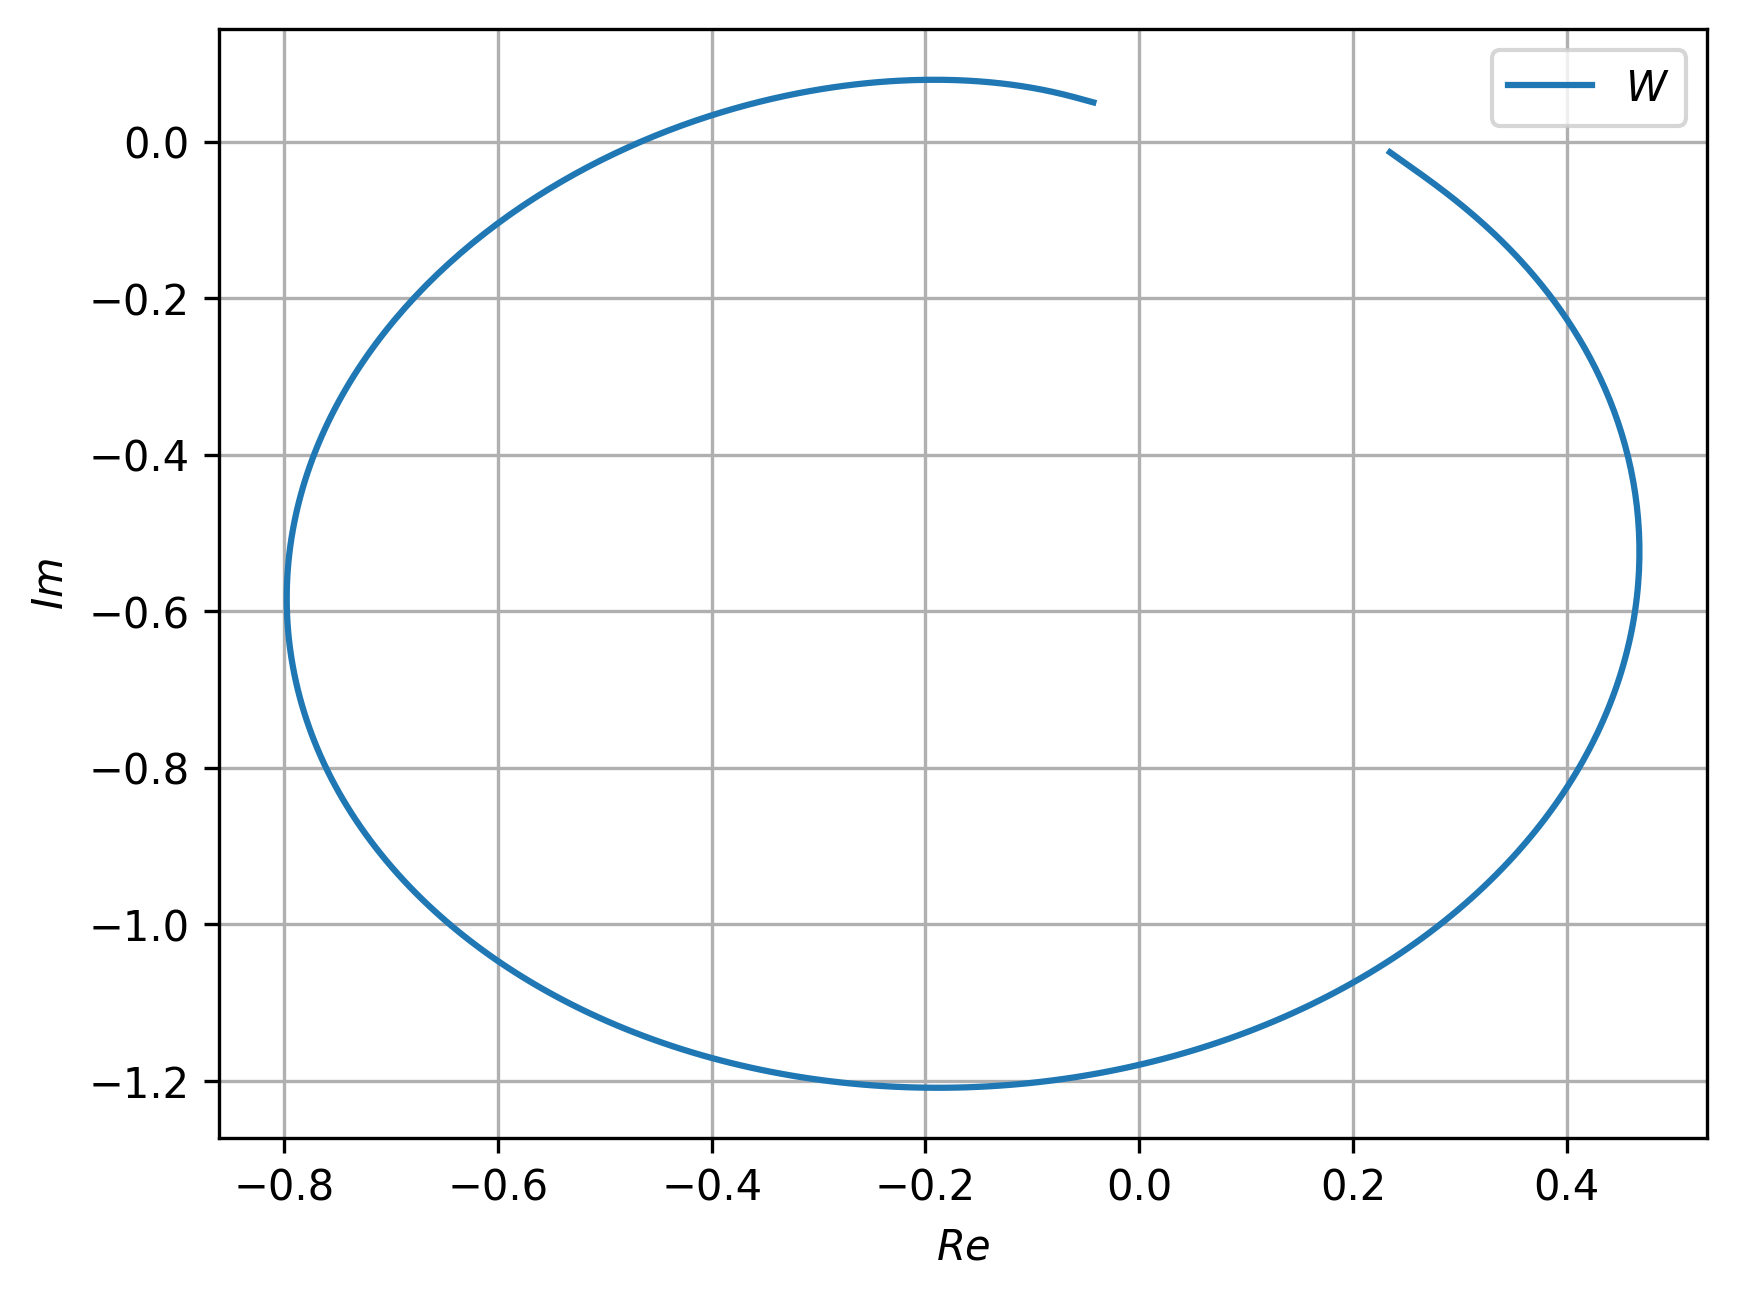

In [45]:
fi_s =  []
A_s = []
Re_s = []
Im_s = []

for i in range(len(fi_rez)):
    fi_s.append(fi_rez[i]+fi_st[i])
    A_s.append(A_rez[i]*A_st[i])


Re_s, Im_s = calc_coords(fi_s, A_s)

plt.plot(Re_s, Im_s, label='$W$')
plt.legend()
plt.grid()
plt.xlabel("$Re$")
plt.ylabel("$Im$")
plt.show()


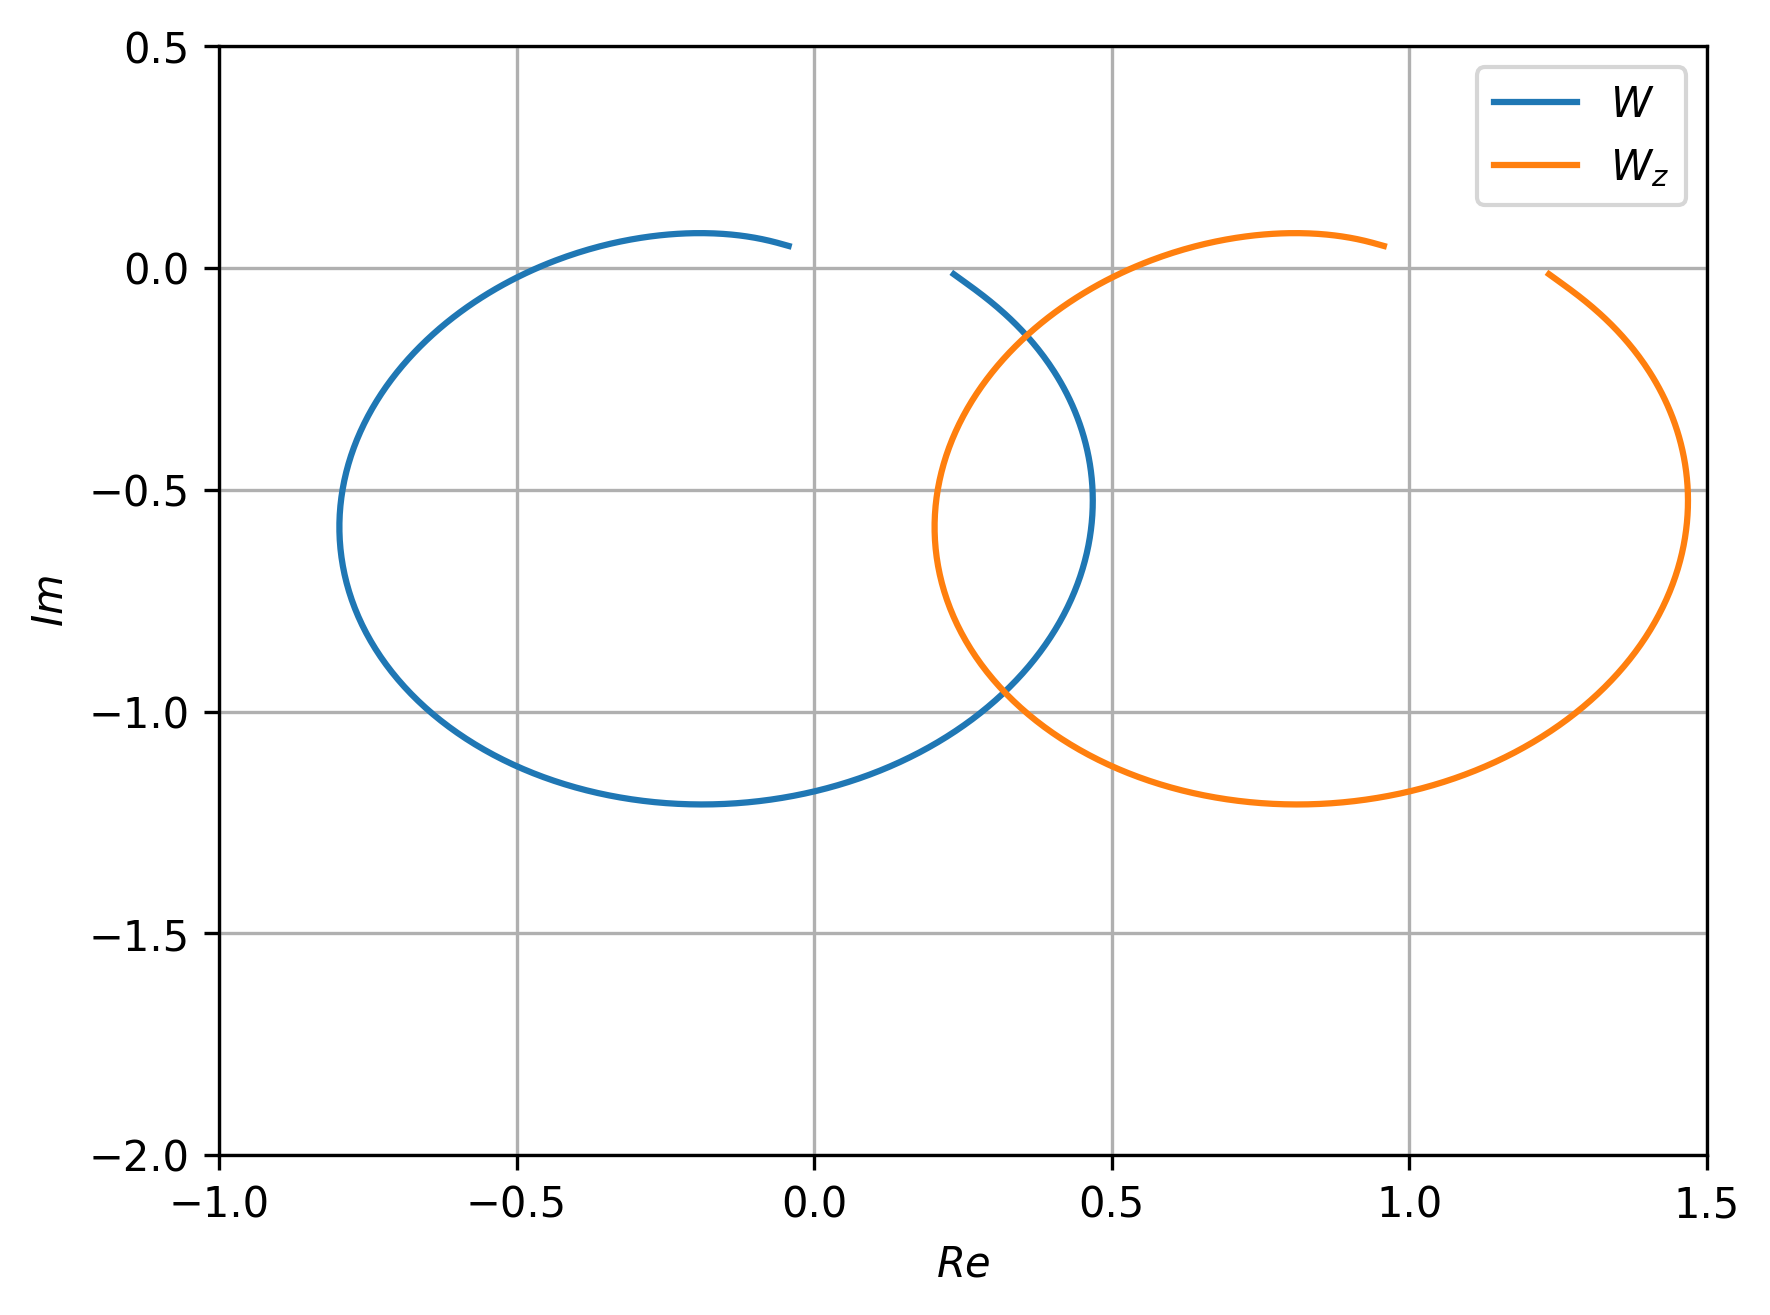

In [55]:
fi_zn =  []
A_zn = []
Re_zn = []
Im_zn = []

for i in range(len(Re_s)):
    Re_zn.append(Re_s[i]+1)
    Im_zn.append(Im_s[i])

fi_zn, A_zn = calc_polar(Re_zn, Im_zn)

plt.plot(Re_s, Im_s, label='$W$')
plt.plot(Re_zn, Im_zn, label='$W_z$')
plt.legend()
plt.grid()
plt.xlabel("$Re$")
plt.xlim([-1, 1.5])
plt.ylim([-2, 0.5])
plt.ylabel("$Im$")
plt.show()



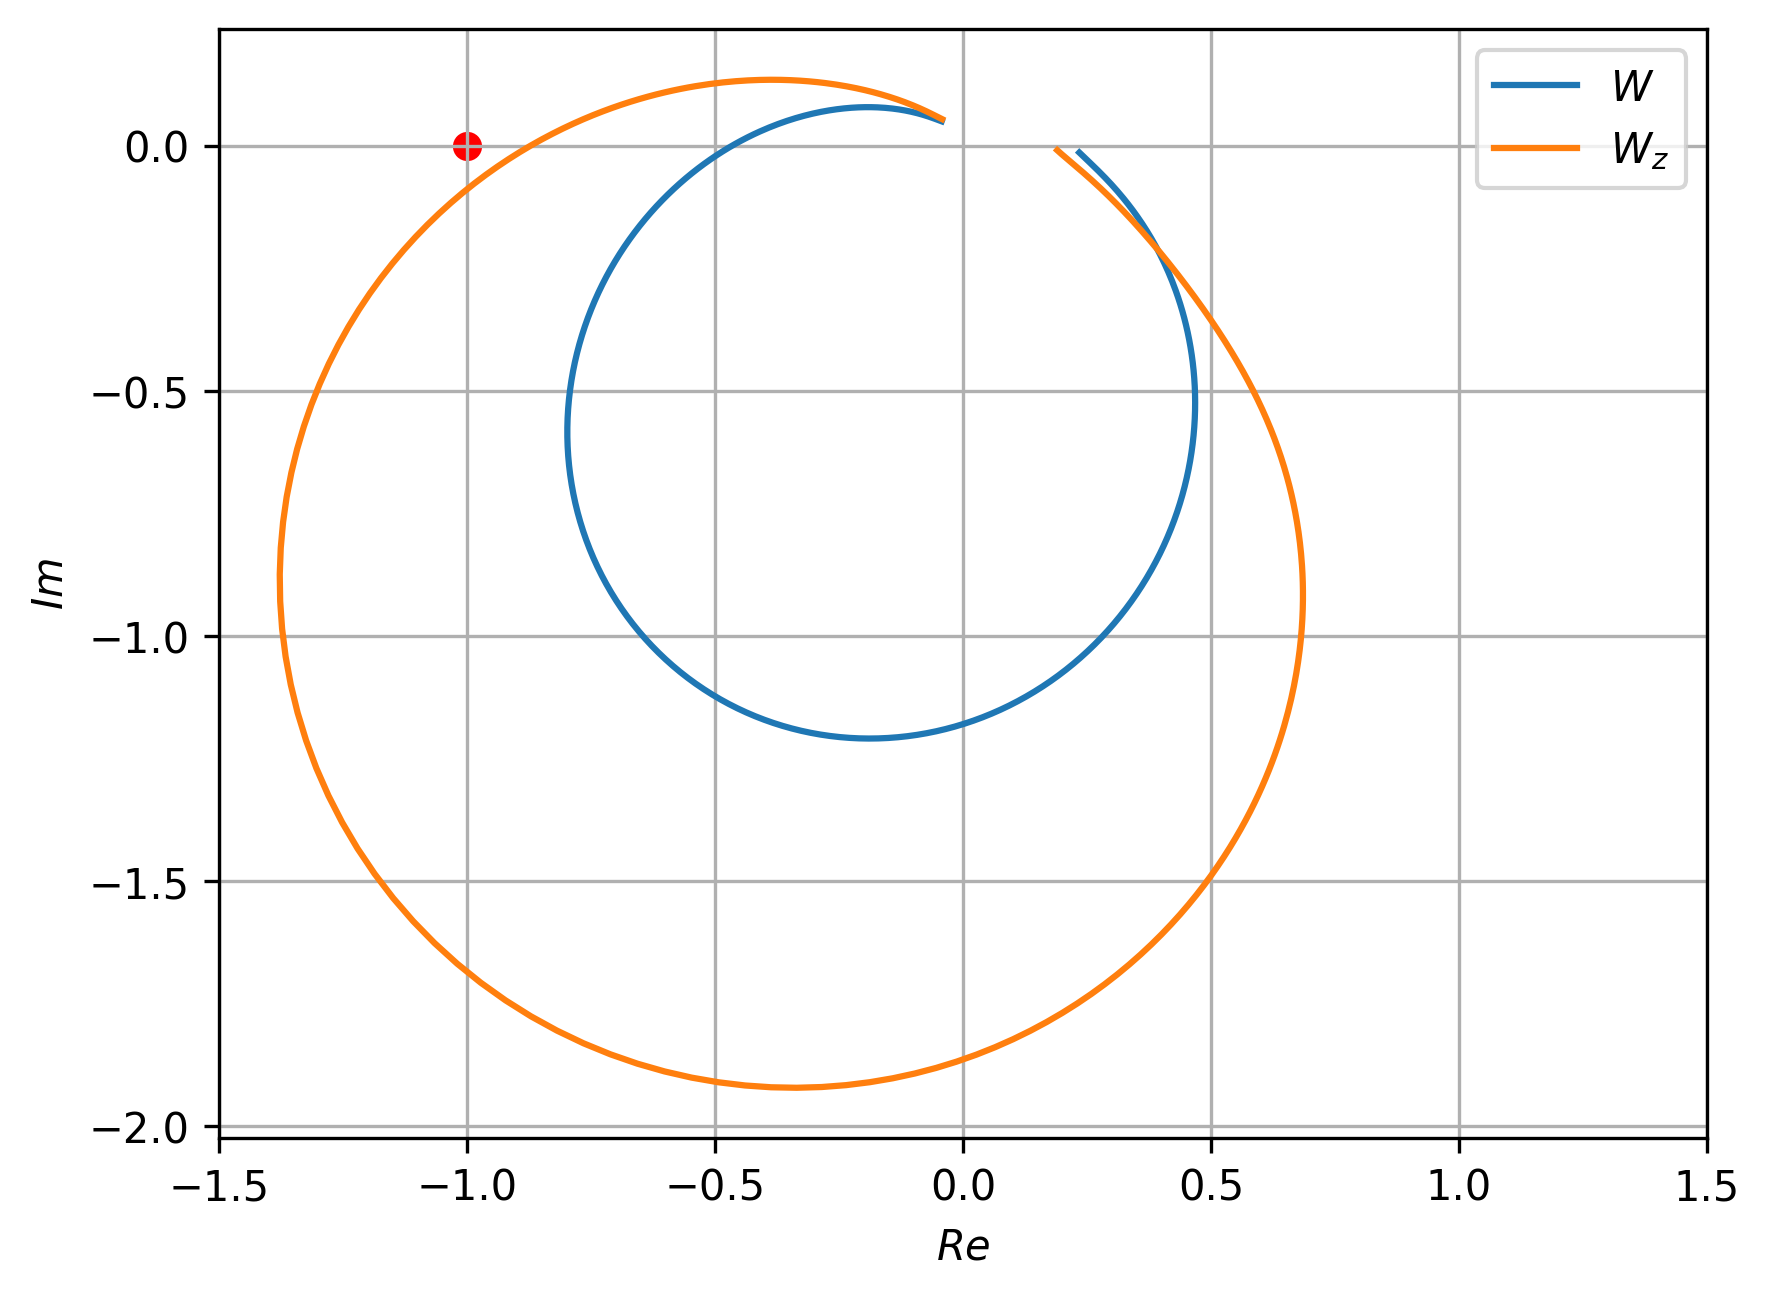

In [51]:
fi_y =  []
A_y = []
Re_y = []
Im_y = []

for i in range(len(fi_s)):
    fi_y.append(fi_s[i]-fi_zn[i])
    A_y.append(A_s[i]/A_zn[i])

Re_y, Im_y = calc_coords(fi_y, A_y)

plt.plot(Re_s, Im_s, label='$W$')
plt.plot(Re_y, Im_y, label='$W_z$')
plt.scatter(-1, 0, color='red')
plt.legend()
plt.grid()
plt.xlabel("$Re$")
plt.xlim([-1.5, 1.5])
plt.ylabel("$Im$")
plt.show()
